In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import keras
import glob

import os
import matplotlib.pyplot as plt

from keras.models import Sequential
"""Import from keras_preprocessing not from keras.preprocessing, because Keras may or maynot contain the features discussed here depending upon when you read this article, until the keras_preprocessed library is updated in Keras use the github version."""
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
from tensorflow.keras.preprocessing import image

from google.colab import drive
drive.mount('/gdrive')
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from keras import backend as K
import functools

import seaborn as sns

import re
import random
import cv2
# from tensorflow.keras import optimizers

# experiment_dir = '/gdrive/My Drive/*/ICS619'
# image_count = len(glob.glob(experiment_dir+'/Dataset_small/images/*.jpg'))
# print(image_count)

Mounted at /gdrive


In [ ]:
# df = pd.read_csv('styles.csv', header = 'infer',error_bad_lines = False)
# # df.drop('year', axis=1, inplace=True)
# # df.drop('productDisplayName', axis=1, inplace=True)
# df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,usage
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,Casual
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,Casual
2,59263,Women,Accessories,Watches,Watches,Grey,Winter,Casual
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,Casual
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,Casual
...,...,...,...,...,...,...,...,...
41719,42234,Women,Apparel,Topwear,Tops,Blue,Summer,Casual
41720,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,Casual
41721,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,Casual
41722,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,Casual


In [ ]:
############### X ######################
############### X ######################

categorical_cols = ['gender', 'masterCategory', 'subCategory', 'articleType','baseColour','season','usage'] 

#import pandas as pd
df2 = pd.get_dummies(df, columns = categorical_cols)
df2['id'] = df['id'].astype(str) + '.jpg'
df2

#################### In the network Dense(152..)

,id,gender_Boys,gender_Girls,gender_Men,gender_Unisex,gender_Women,masterCategory_Accessories,masterCategory_Apparel,masterCategory_Footwear,subCategory_Accessories,...,season_Fall,season_Spring,season_Summer,season_Winter,usage_Casual,usage_Ethnic,usage_Formal,usage_Party,usage_Sports,usage_Travel
0,15970.jpg,0,0,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
1,39386.jpg,0,0,1,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,59263.jpg,0,0,0,0,1,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,21379.jpg,0,0,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
4,53759.jpg,0,0,1,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41719,42234.jpg,0,0,0,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
41720,17036.jpg,0,0,1,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
41721,6461.jpg,0,0,1,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
41722,18842.jpg,0,0,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


## Delete any row in df that is not in images Folder

In [ ]:
############### X ######################
############### X ######################

from tqdm import tqdm
# from PIL import image
import glob
from_images = glob.glob('/gdrive/My Drive/Colab Notebooks/ICS619/Dataset_small/images/*.jpg')
# data = data.drop(labels=0, axis=0)
# instead of 44419 is df2.shape[0]
# هنا لازم تسوي تشيك بحيث انه ال آي لما تحذف راو ف انا اعتقد انه تسوي سكب للراو اللي بعده وعلشان
# تتاكد من صحة هالشي, سو داتا فريم بسيطة وامش عليها
for i in tqdm(range(41720)):
  path = '/gdrive/My Drive/Colab Notebooks/ICS619/Dataset_small/images/' + df2['id'][i]
  if path not in from_images:
    # print(i)
    df2 = df2.drop(labels=i, axis=0)
    df2 = df2.reset_index(drop=True)
    # i = i-5



100%|██████████| 41720/41720 [00:19<00:00, 2173.41it/s]


In [2]:
# df2.to_csv('Styles_Updated.csv', index=False)
!pwd
%cd '/gdrive/My Drive/Colab Notebooks/ICS619'

df2 = pd.read_csv('Styles_Updated.csv', header = 'infer',error_bad_lines = False)
df2[41715:]

/content
/gdrive/My Drive/Colab Notebooks/ICS619


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,id,gender_Boys,gender_Girls,gender_Men,gender_Unisex,gender_Women,masterCategory_Accessories,masterCategory_Apparel,masterCategory_Footwear,subCategory_Accessories,...,season_Fall,season_Spring,season_Summer,season_Winter,usage_Casual,usage_Ethnic,usage_Formal,usage_Party,usage_Sports,usage_Travel
41715,42234.jpg,0,0,0,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
41716,17036.jpg,0,0,1,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
41717,6461.jpg,0,0,1,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
41718,18842.jpg,0,0,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
41719,51623.jpg,0,0,0,0,1,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0


# X_train, y_train, X_test, y_test

## Regular X

In [ ]:
############### X ######################
############### X ######################

from tqdm import tqdm

img_w=100
img_h=100

x=[]

for i in tqdm(range(df2.shape[0])):
  # print(df2['id'][i])
  path = '/gdrive/My Drive/Colab Notebooks/ICS619/Dataset_small/images/' + df2['id'][i]
  img=image.load_img(path,target_size=(img_w,img_h,3))
  img = image.img_to_array(img)
  img = img/255.0
  x.append(img)


x = np.array(x)


save('x.npy', x)
# savez_compressed('x1.npy', x)
# with open('xX.npy', 'wb') as f:
#     np.save(f, x)

## Sharpen

In [4]:

############### X ######################
############### X ######################
from tqdm import tqdm
import cv2

img_w=100
img_h=100
# %cd '/gdrive/My Drive/Colab Notebooks/ICS619/X2'
x_sharp=[]

for i in tqdm(range(df2.shape[0])):
  path = '/gdrive/My Drive/Colab Notebooks/ICS619/Dataset_small/images/' + df2['id'][i]
  img = cv2.imread(path)
  img = cv2.filter2D(img, -1, kernel)
  filename = df2['id'][i]
  cv2.imwrite(filename, img)

x_sharp = np.array(x_sharp)

In [5]:
############### X ######################
############### X ######################

from tqdm import tqdm

img_w=100
img_h=100

x=[]

for i in tqdm(range(df2.shape[0])):
  # print(df2['id'][i])
  path = '/gdrive/My Drive/Colab Notebooks/ICS619/X_sh/' + df2['id'][i]
  img=image.load_img(path,target_size=(img_w,img_h,3))
  img = image.img_to_array(img)
  img = img/255.0
  x.append(img)


x = np.array(x)

with open('x_sh.npy', 'wb') as f:
    np.save(f, x)

## Histogram Eq

In [6]:
############### X ######################
############### X ######################
from tqdm import tqdm
import cv2

img_w=100
img_h=100
%cd '/gdrive/My Drive/Colab Notebooks/ICS619/X_HE'
x_HE=[]

for i in tqdm(range(df2.shape[0])):
  path = '/gdrive/My Drive/Colab Notebooks/ICS619/Dataset_small/images/' + df2['id'][i]
  rgb_img = cv2.imread(path)
  ycrcb_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2YCrCb)
  ycrcb_img[:, :, 0] = cv2.equalizeHist(ycrcb_img[:, :, 0])
  equalized_img = cv2.cvtColor(ycrcb_img, cv2.COLOR_YCrCb2BGR)
  filename = df2['id'][i]
  cv2.imwrite(filename, equalized_img)

# x_HE = np.array(x_HE)


In [7]:
############### X ######################
############### X ######################
from tqdm import tqdm
from keras.preprocessing import image

img_w=100
img_h=100

x=[]

for i in tqdm(range(df2.shape[0])):
  # print(df2['id'][i])
  path = '/gdrive/My Drive/Colab Notebooks/ICS619/X_HE/' + df2['id'][i]
  img = image.load_img(path,target_size=(img_w,img_h,3))
  img = image.img_to_array(img)
  img = img/255.0
  x.append(img)


x = np.array(x)

with open('x_HE.npy', 'wb') as f:
    np.save(f, x)

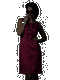

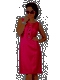

In [ ]:
############### X ######################
############### X ######################

def run_histogram_equalization(image_path):
    rgb_img = cv2.imread(image_path)

    # convert from RGB color-space to YCrCb
    ycrcb_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2YCrCb)

    # equalize the histogram of the Y channel
    ycrcb_img[:, :, 0] = cv2.equalizeHist(ycrcb_img[:, :, 0])

    # convert back to RGB color-space from YCrCb
    equalized_img = cv2.cvtColor(ycrcb_img, cv2.COLOR_YCrCb2BGR)

    cv2_imshow(equalized_img)
    cv2.waitKey(0)

run_histogram_equalization('/gdrive/My Drive/Colab Notebooks/ICS619/Dataset_small/images/59990.jpg')

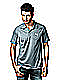

In [ ]:
############### X ######################
############### X ######################

path = '/gdrive/My Drive/Colab Notebooks/ICS619/Dataset_small/images/' + df2['id'][4]
img=image.load_img(path,target_size=(img_w,img_h,3))

img = cv2.imread(path)
img = cv2.filter2D(img, -1, kernel)
# equ = cv2.equalizeHist(img)
# stacking images side-by-side
# res = np.hstack((img, equ))
from google.colab.patches import cv2_imshow
cv2_imshow(img)

### Save and Load the data

In [16]:
from numpy import save, savez_compressed,load
# save('x.npy', x)
# x = load('x.npy') # تاكد انك بنفس الدايركتري اللي هو ics619
x = load('x_sh.npy')

y = df2.drop(['id'],axis=1)
y = y.to_numpy()
x.shape, y.shape

((41720, 100, 100, 3), (41720, 152))

In [ ]:
# import pickle
# ClassNames = df2.drop(['id'],axis=1)
# ClassNames = list(ClassNames.columns)
# ClassNames = df2.columns[1:]
# df2.to_csv('ClassNames_df.csv')
# type(ClassNames)
# # with open("ClassNames", "wb") as fp:
# #   pickle.dump(ClassNames, fp)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=0,test_size=0.1)
# X_valid, X_test, y_valid, y_test = train_test_split(X_valid,y_valid,random_state=0,test_size=0.5)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37548, 100, 100, 3), (4172, 100, 100, 3), (37548, 152), (4172, 152))

# Deep Learning Models

# 1- VGG Model

In [48]:
from tensorflow.keras.applications.vgg16 import VGG16

vgg_model = VGG16(include_top=False,
                  weights="imagenet",
                  input_shape=(100, 100, 3))

# for layer in vgg_model.layers:
    # layer.trainable=False 


fine_tune = 0

if fine_tune > 0:
  for layer in vgg_model.layers[:-fine_tune]:
    layer.trainable = False
else:
  for layer in vgg_model.layers:
    layer.trainable = False

flat1 = Flatten()(vgg_model.layers[-1].output)
class1 = Dense(64, activation='relu')(flat1)
output = Dense(152, activation='sigmoid')(class1)

VGG_model = Model(inputs = vgg_model.inputs, outputs = output)

# Top7_acc = functools.partial(tf.keras.metrics.top_k_categorical_accuracy, k=7)
# Top7_acc.__name__ = 'Top7_acc'

Top7_acc = tf.keras.metrics.TopKCategoricalAccuracy(k=7, name='top_k_categorical_accuracy')
Top7_recall = keras.metrics.Recall(top_k=7)
Top7_Precision = tf.keras.metrics.Precision(top_k=7)
# VGG_model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=[keras.metrics.Recall(top_k=7)])

##################################### IMPORTANT ################################
VGG_model.compile(loss = 'binary_crossentropy', metrics=[Top7_acc, Top7_recall, Top7_Precision])
################################################################################


VGG_model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0  

In [49]:
Num_EPOCHS = 15

checkpoint_filepath = '/gdrive/My Drive/Colab Notebooks/ICS619/Models/VGG_model.{epoch:02d}-{val_loss:.2f}.h5'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_recall_26',
    mode='max',
    save_best_only=True)

# ,callbacks=[model_checkpoint_callback]

VGG_model.fit(X_train , y_train,validation_split=0.1 , epochs=Num_EPOCHS , batch_size=32)
              # ,callbacks=[model_checkpoint_callback])

Epoch 1/15
1057/1057 [==============================] - 245s 231ms/step - loss: 0.0701 - top_k_categorical_accuracy: 0.8472 - recall_10: 0.7185 - precision_7: 0.7184 - val_loss: 0.0550 - val_top_k_categorical_accuracy: 0.8650 - val_recall_10: 0.7679 - val_precision_7: 0.7679
Epoch 2/15
1057/1057 [==============================] - 247s 233ms/step - loss: 0.0491 - top_k_categorical_accuracy: 0.8797 - recall_10: 0.7905 - precision_7: 0.7905 - val_loss: 0.0523 - val_top_k_categorical_accuracy: 0.8916 - val_recall_10: 0.7745 - val_precision_7: 0.7745
Epoch 3/15
1057/1057 [==============================] - 245s 232ms/step - loss: 0.0456 - top_k_categorical_accuracy: 0.8889 - recall_10: 0.8044 - precision_7: 0.8043 - val_loss: 0.0561 - val_top_k_categorical_accuracy: 0.7752 - val_recall_10: 0.7597 - val_precision_7: 0.7596
Epoch 4/15
1057/1057 [==============================] - 230s 218ms/step - loss: 0.0436 - top_k_categorical_accuracy: 0.8957 - recall_10: 0.8132 - precision_7: 0.8132 - val_

In [50]:
score_VGG = VGG_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score_VGG[0])
print('Test accuracy:', score_VGG[1])
print('Test Recall:', score_VGG[2])
print('Test precision:', score_VGG[3])

Test loss: 0.052144940942525864
Test accuracy: 0.8918983936309814
Test Recall: 0.8019723892211914
Test precision: 0.80194491147995


## Tunning VGG

In [51]:
from tensorflow.keras.applications.vgg16 import VGG16

vgg_model = VGG16(include_top=False,
                  weights="imagenet",
                  input_shape=(100, 100, 3),
                  pooling = 'avg')

# for layer in vgg_model.layers:
    # layer.trainable=False 


fine_tune = 5

if fine_tune > 0:
  for layer in vgg_model.layers[:-fine_tune]:
    layer.trainable = False
else:
  for layer in vgg_model.layers:
    layer.trainable = False

flat1 = Flatten()(vgg_model.layers[-1].output)
# class1 = Dense(256, activation='relu')(flat1)

# class1 = Dense(512, activation='relu')(flat1)
# x = Dropout(0.5)(class1) # Dropout layer to reduce overfitting
# x = Dense(256, activation='relu')(class1)

output = Dense(152, activation='sigmoid')(flat1)

VGG_model = Model(inputs = vgg_model.inputs, outputs = output)

# Top7_acc = functools.partial(tf.keras.metrics.top_k_categorical_accuracy, k=7)
# Top7_acc.__name__ = 'Top7_acc'

Top7_acc = tf.keras.metrics.TopKCategoricalAccuracy(k=7, name='top_k_categorical_accuracy')
Top7_recall = keras.metrics.Recall(top_k=7)
Top7_Precision = tf.keras.metrics.Precision(top_k=7)
# VGG_model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=[keras.metrics.Recall(top_k=7)])

##################################### IMPORTANT ################################
VGG_model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=[Top7_acc, Top7_recall, Top7_Precision])
################################################################################


VGG_model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0   

In [ ]:
VGG_model.fit(X_train , y_train,validation_split=0.1 , epochs=15 , batch_size=32)

In [22]:
# VGG_model.save("Model_VGG_84.h5")
# InceptionV3_Model.save("InceptionV3_Model_84.h5")

VGG_model = tf.keras.models.load_model("Model_VGG_84.h5")


In [61]:
score_VGG = VGG_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score_VGG[0])
print('Test accuracy:', score_VGG[1])
print('Test Recall:', score_VGG[2])
print('Test precision:', score_VGG[3])

Test loss: 0.04530666396021843
Test accuracy: 0.8799999952316284
Test Recall: 0.8114285469055176
Test precision: 0.8114285469055176


# 2- ResNet Model

In [4]:
from tensorflow.keras.applications.resnet50 import ResNet50

# from keras.applications.resnet50 import ResNet50


ResNet_Model = ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(100, 100, 3)
)

# vgg_model = VGG16(include_top=False, input_shape=(100, 100, 3))

for layer in ResNet_Model.layers:
    layer.trainable=False

flat1 = Flatten()(ResNet_Model.layers[-1].output)
class1 = Dense(64, activation='relu')(flat1)
output = Dense(152, activation='sigmoid')(class1)

ResNet_Model = Model(inputs = ResNet_Model.inputs, outputs = output)

Top7_acc = functools.partial(tf.keras.metrics.top_k_categorical_accuracy, k=7)
Top7_acc.__name__ = 'Top7_acc'
Top7_Precision = tf.keras.metrics.Precision(top_k=7)
Top7_Recall = keras.metrics.Recall(top_k=7)


ResNet_Model.compile(loss = 'binary_crossentropy', metrics=[Top7_acc,Top7_Precision,Top7_Recall])
# model.compile('adam', 'categorical_crossentropy', ['accuracy', 'top_k_categorical_accuracy'])

ResNet_Model.summary()

94781440/94765736 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 106, 106, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 50, 50, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization

In [7]:
Num_EPOCHS = 20

checkpoint_filepath = '/gdrive/My Drive/Colab Notebooks/ICS619/ResNet_model.{epoch:02d}-{val_loss:.2f}.h5'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_recall',
    mode='max',
    save_best_only=True)


# ,callbacks=[model_checkpoint_callback]
ResNet_Model.fit(X_train,y_train,validation_split=0.1,epochs=Num_EPOCHS, batch_size=32)
              # ,callbacks=[model_checkpoint_callback])


Epoch 1/20
1057/1057 [==============================] - 158s 146ms/step - loss: 0.1365 - Top7_acc: 0.7710 - precision: 0.4807 - recall: 0.4808 - val_loss: 0.1134 - val_Top7_acc: 0.5204 - val_precision: 0.5159 - val_recall: 0.5160
Epoch 2/20
1057/1057 [==============================] - 167s 158ms/step - loss: 0.0974 - Top7_acc: 0.7774 - precision: 0.5828 - recall: 0.5829 - val_loss: 0.1160 - val_Top7_acc: 0.7031 - val_precision: 0.5120 - val_recall: 0.5121
Epoch 3/20
1057/1057 [==============================] - 166s 157ms/step - loss: 0.0943 - Top7_acc: 0.7568 - precision: 0.5942 - recall: 0.5943 - val_loss: 0.1230 - val_Top7_acc: 0.7593 - val_precision: 0.5312 - val_recall: 0.5313
Epoch 4/20
1057/1057 [==============================] - 170s 161ms/step - loss: 0.0926 - Top7_acc: 0.7706 - precision: 0.6001 - recall: 0.6002 - val_loss: 0.0944 - val_Top7_acc: 0.7771 - val_precision: 0.5899 - val_recall: 0.5899
Epoch 5/20
1057/1057 [==============================] - 171s 162ms/step - loss: 

In [8]:
ResNet_score = ResNet_Model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', ResNet_score[0])
print('Test accuracy:', ResNet_score[1])
print('Test Recall:', ResNet_score[2])
print('Test precision:', ResNet_score[3])

# NEW ONE

Test loss: 0.09835080802440643
Test accuracy: 0.7677372694015503
Test Recall: 0.6128612756729126
Test precision: 0.6128822565078735


# 3- Inceptionv3 Model

In [9]:
from tensorflow.keras.applications import InceptionV3

InceptionV3_Model = InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=(100, 100, 3)
)

# for layer in InceptionV3_Model.layers:
#     layer.trainable=False

fine_tune =0

if fine_tune > 0:
  for layer in InceptionV3_Model.layers[:-fine_tune]:
    layer.trainable = False
else:
  for layer in InceptionV3_Model.layers:
    layer.trainable = False



flat1 = Flatten()(InceptionV3_Model.layers[-1].output)
class1 = Dense(64, activation='relu')(flat1)
output = Dense(152, activation='sigmoid')(class1)

InceptionV3_Model = Model(inputs = InceptionV3_Model.inputs, outputs = output)

# Top7_acc = functools.partial(tf.keras.metrics.top_k_categorical_accuracy, k=7)
# Top7_acc.__name__ = 'Top7_acc'
Top7_acc = tf.keras.metrics.TopKCategoricalAccuracy(k=7, name='top_k_categorical_accuracy')
Top7_Precision = tf.keras.metrics.Precision(top_k=7)
Top7_Recall = keras.metrics.Recall(top_k=7)
######################################################################################################
InceptionV3_Model.compile(loss = 'binary_crossentropy',  metrics=[Top7_acc,Top7_Precision,Top7_Recall])
# model.compile('adam', 'categorical_crossentropy', ['accuracy', 'top_k_categorical_accuracy'])
######################################################################################################

InceptionV3_Model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 49, 49, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 49, 49, 32)  96          ['conv2d_94[0][0]']              
 ormalization)                                                                                    
                                                                                            

In [12]:
Num_EPOCHS = 20

checkpoint_filepath = '/gdrive/My Drive/Colab Notebooks/ICS619/InceptionV3_model.{epoch:02d}-{val_loss:.2f}.h5'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_recall', 
    mode='max',
    save_best_only=True)


# ,callbacks=[model_checkpoint_callback]
InceptionV3_Model.fit(X_train,y_train,validation_split=0.1,epochs=Num_EPOCHS, batch_size=32)
              # ,callbacks=[model_checkpoint_callback])

Epoch 1/20
1057/1057 [==============================] - 79s 70ms/step - loss: 0.0726 - top_k_categorical_accuracy: 0.8162 - precision_2: 0.7081 - recall_2: 0.7081 - val_loss: 0.0601 - val_top_k_categorical_accuracy: 0.8698 - val_precision_2: 0.7432 - val_recall_2: 0.7432
Epoch 2/20
1057/1057 [==============================] - 86s 81ms/step - loss: 0.0544 - top_k_categorical_accuracy: 0.8491 - precision_2: 0.7645 - recall_2: 0.7645 - val_loss: 0.0574 - val_top_k_categorical_accuracy: 0.8487 - val_precision_2: 0.7535 - val_recall_2: 0.7536
Epoch 3/20
1057/1057 [==============================] - 90s 86ms/step - loss: 0.0516 - top_k_categorical_accuracy: 0.8628 - precision_2: 0.7771 - recall_2: 0.7772 - val_loss: 0.0550 - val_top_k_categorical_accuracy: 0.8634 - val_precision_2: 0.7652 - val_recall_2: 0.7652
Epoch 4/20
1057/1057 [==============================] - 93s 88ms/step - loss: 0.0501 - top_k_categorical_accuracy: 0.8674 - precision_2: 0.7839 - recall_2: 0.7840 - val_loss: 0.0563 - 

In [13]:
InceptionV3_score = InceptionV3_Model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', InceptionV3_score[0])
print('Test accuracy:', InceptionV3_score[1])
print('Test Recall:', InceptionV3_score[2])
print('Test precision:', InceptionV3_score[3])

Test loss: 0.07418502867221832
Test accuracy: 0.8358101844787598
Test Recall: 0.7434598207473755
Test precision: 0.7434852719306946


In [29]:

VGG_model.save("Model_VGG_T.h5")

InceptionV3_Model.save("Inception_Model_T.h5")


# InceptionV3_score = InceptionV3_Model.evaluate(X_test, y_test, verbose=0)
# print('Test loss:', InceptionV3_score[0])
# print('Test accuracy:', InceptionV3_score[1])

## Tunning Inception

In [14]:
from tensorflow.keras.applications import InceptionV3

InceptionV3_Model = InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=(100, 100, 3),
    pooling = None
)

# for layer in InceptionV3_Model.layers:
#     layer.trainable=False

fine_tune = 50 ## 100

if fine_tune > 0:
  for layer in InceptionV3_Model.layers[:-fine_tune]:
    layer.trainable = False
else:
  for layer in InceptionV3_Model.layers:
    layer.trainable = False



flat1 = Flatten()(InceptionV3_Model.layers[-1].output)
# class1 = Dense(256, activation='relu')(flat1)
output = Dense(152, activation='sigmoid')(flat1)

InceptionV3_Model = Model(inputs = InceptionV3_Model.inputs, outputs = output)

# Top7_acc = functools.partial(tf.keras.metrics.top_k_categorical_accuracy, k=7)
# Top7_acc.__name__ = 'Top7_acc'
Top7_acc = tf.keras.metrics.TopKCategoricalAccuracy(k=7, name='top_k_categorical_accuracy')
Top7_Precision = tf.keras.metrics.Precision(top_k=7)
Top7_Recall = keras.metrics.Recall(top_k=7)
######################################################################################################
InceptionV3_Model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=[Top7_acc,
                                                                                   Top7_Precision,
                                                                                   Top7_Recall])
# model.compile('adam', 'categorical_crossentropy', ['accuracy', 'top_k_categorical_accuracy'])
######################################################################################################

InceptionV3_Model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_282 (Conv2D)            (None, 49, 49, 32)   864         ['input_4[0][0]']                
                                                                                                  
 batch_normalization_282 (Batch  (None, 49, 49, 32)  96          ['conv2d_282[0][0]']             
 Normalization)                                                                                   
                                                                                            

In [44]:
Num_EPOCHS = 25

checkpoint_filepath = '/gdrive/My Drive/Colab Notebooks/ICS619/InceptionV3_model.{epoch:02d}-{val_loss:.2f}.h5'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_recall', 
    mode='max',
    save_best_only=True)


# ,callbacks=[model_checkpoint_callback]
InceptionV3_Model.fit(X_train,y_train,validation_split=0.1,epochs=Num_EPOCHS, batch_size=32)
              # ,callbacks=[model_checkpoint_callback])

Epoch 1/25
1057/1057 [==============================] - 144s 132ms/step - loss: 0.0557 - top_k_categorical_accuracy: 0.8504 - precision_10: 0.7670 - recall_11: 0.7671 - val_loss: 0.0458 - val_top_k_categorical_accuracy: 0.8836 - val_precision_10: 0.8010 - val_recall_11: 0.8010
Epoch 2/25
1057/1057 [==============================] - 158s 150ms/step - loss: 0.0416 - top_k_categorical_accuracy: 0.8869 - precision_10: 0.8170 - recall_11: 0.8171 - val_loss: 0.0407 - val_top_k_categorical_accuracy: 0.8911 - val_precision_10: 0.8231 - val_recall_11: 0.8232
Epoch 3/25
1057/1057 [==============================] - 144s 136ms/step - loss: 0.0370 - top_k_categorical_accuracy: 0.9013 - precision_10: 0.8354 - recall_11: 0.8355 - val_loss: 0.0397 - val_top_k_categorical_accuracy: 0.8924 - val_precision_10: 0.8280 - val_recall_11: 0.8281
Epoch 4/25
1057/1057 [==============================] - 144s 136ms/step - loss: 0.0337 - top_k_categorical_accuracy: 0.9127 - precision_10: 0.8499 - recall_11: 0.8499

# 4- EfficientNet Model

In [19]:
from tensorflow.keras.applications.efficientnet import EfficientNetB7

EfficientNetB7_Model = EfficientNetB7(
    include_top=False,
    weights="imagenet",
    input_shape=(100, 100, 3)
)

for layer in EfficientNetB7_Model.layers:
    layer.trainable=False

flat1 = Flatten()(EfficientNetB7_Model.layers[-1].output)
class1 = Dense(64, activation='relu')(flat1)
output = Dense(152, activation='sigmoid')(class1)

EfficientNetB7_Model = Model(inputs = EfficientNetB7_Model.inputs, outputs = output)

Top7_acc = functools.partial(tf.keras.metrics.top_k_categorical_accuracy, k=7)
Top7_acc.__name__ = 'Top7_acc'

Top7_Precision = tf.keras.metrics.Precision(top_k=7)
Top7_Recall = keras.metrics.Recall(top_k=7)


EfficientNetB7_Model.compile(loss = 'binary_crossentropy',
                             metrics=[Top7_acc, Top7_Precision, Top7_Recall])
# model.compile('adam', 'categorical_crossentropy', ['accuracy', 'top_k_categorical_accuracy'])

EfficientNetB7_Model.summary()

258088960/258076736 [==============================] - 3s 0us/step
Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 100, 100, 3)  0           ['input_4[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 100, 100, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPaddi

In [20]:
Num_EPOCHS = 10

checkpoint_filepath = '/gdrive/My Drive/Colab Notebooks/ICS619/EfficientNetB7_model.{epoch:02d}-{val_loss:.2f}.h5'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_recall',
    mode='max',
    save_best_only=True)


# ,callbacks=[model_checkpoint_callback]
EfficientNetB7_Model.fit(X_train,y_train,validation_split=0.1,epochs=Num_EPOCHS, batch_size=32)
              # ,callbacks=[model_checkpoint_callback])


Epoch 1/10
1057/1057 [==============================] - 805s 744ms/step - loss: 0.5188 - Top7_acc: 0.8994 - precision_4: 0.4705 - recall_4: 0.4705 - val_loss: 0.3421 - val_Top7_acc: 0.9190 - val_precision_4: 0.4781 - val_recall_4: 0.4781
Epoch 2/10
1057/1057 [==============================] - 770s 729ms/step - loss: 0.2570 - Top7_acc: 0.9138 - precision_4: 0.4777 - recall_4: 0.4778 - val_loss: 0.1902 - val_Top7_acc: 0.9190 - val_precision_4: 0.4781 - val_recall_4: 0.4781
Epoch 3/10
1057/1057 [==============================] - 778s 736ms/step - loss: 0.1589 - Top7_acc: 0.9154 - precision_4: 0.4785 - recall_4: 0.4785 - val_loss: 0.1376 - val_Top7_acc: 0.9190 - val_precision_4: 0.4781 - val_recall_4: 0.4781
Epoch 4/10
1057/1057 [==============================] - 759s 718ms/step - loss: 0.1318 - Top7_acc: 0.9136 - precision_4: 0.4778 - recall_4: 0.4778 - val_loss: 0.1225 - val_Top7_acc: 0.9190 - val_precision_4: 0.4781 - val_recall_4: 0.4781
Epoch 5/10
1057/1057 [==========================

In [21]:
EfficientNetB7_score = EfficientNetB7_Model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', EfficientNetB7_score[0])
print('Test accuracy:', EfficientNetB7_score[1])
print('Test Recall:', EfficientNetB7_score[2])
print('Test precision:', EfficientNetB7_score[3])

Test loss: 0.11652509868144989
Test accuracy: 0.9158676862716675
Test Recall: 0.47931790351867676
Test precision: 0.4793343245983124


# Ensmable Model

In [15]:
PreTrained_models = []
Models = ['Model_VGG_84.h5','Model_ResNet_84.h5']
for i in Models:
    f = os.path.join('/gdrive/My Drive/Colab Notebooks/ICS619', i)
    model = tf.keras.models.load_model(f)
    PreTrained_models.append(model)

models = PreTrained_models

In [16]:
Top7_acc = tf.keras.metrics.TopKCategoricalAccuracy(k=7, name='top_k_categorical_accuracy')
Top7_recall = keras.metrics.Recall(top_k=7)
Top7_Precision = tf.keras.metrics.Precision(top_k=7)

for i, model in enumerate(models):
    for layer in model.layers:
        layer.trainable = False
input_ = [model.input for model in models]
output_ = [model.output for model in models]
conc = tf.keras.layers.concatenate(output_)
# merge = tf.keras.layers.Dense(256, activation='sigmoid')(conc) #############################
output = tf.keras.layers.Dense(152, activation='sigmoid')(conc)
model = tf.keras.models.Model(inputs=input_, outputs=output)
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss=tf.keras.losses.
              BinaryCrossentropy(from_logits=True), metrics=[Top7_acc,Top7_recall,Top7_Precision])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [17]:
X = [X_train for _ in range(len(model.input))]
X_Test = [X_test for _ in range(len(model.input))]

## Ensamble Stacking (VGG + Inception)

In [37]:
epochs = 7
# history = model.fit(X, y_train,
#                     epochs=epochs,
#                     validation_data=(X_1, y_test),
#                     )

# ,validation_split=0.1

history = model.fit(X, y_train,
                    epochs=epochs,
                    validation_split=0.1)



Epoch 1/7
1057/1057 [==============================] - 275s 260ms/step - loss: 0.0206 - top_k_categorical_accuracy: 0.9620 - recall_7: 0.9184 - precision_4: 0.9183 - val_loss: 0.0343 - val_top_k_categorical_accuracy: 0.9289 - val_recall_7: 0.8625 - val_precision_4: 0.8624
Epoch 2/7
1057/1057 [==============================] - 272s 257ms/step - loss: 0.0201 - top_k_categorical_accuracy: 0.9630 - recall_7: 0.9195 - precision_4: 0.9195 - val_loss: 0.0344 - val_top_k_categorical_accuracy: 0.9292 - val_recall_7: 0.8631 - val_precision_4: 0.8630
Epoch 3/7
1057/1057 [==============================] - 275s 260ms/step - loss: 0.0198 - top_k_categorical_accuracy: 0.9634 - recall_7: 0.9204 - precision_4: 0.9203 - val_loss: 0.0344 - val_top_k_categorical_accuracy: 0.9286 - val_recall_7: 0.8638 - val_precision_4: 0.8638
Epoch 4/7
1057/1057 [==============================] - 278s 263ms/step - loss: 0.0195 - top_k_categorical_accuracy: 0.9635 - recall_7: 0.9211 - precision_4: 0.9211 - val_loss: 0.034

In [18]:
epochs = 2
# history = model.fit(X, y_train,
#                     epochs=epochs,
#                     validation_data=(X_1, y_test),
#                     )

# ,validation_split=0.1

history = model.fit(X, y_train,
                    epochs=epochs,
                    validation_split=0.1)



Epoch 1/2


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1057/1057 [==============================] - 404s 378ms/step - loss: 0.1463 - top_k_categorical_accuracy: 0.8770 - recall_3: 0.6808 - precision_3: 0.6807 - val_loss: 0.0687 - val_top_k_categorical_accuracy: 0.9060 - val_recall_3: 0.7625 - val_precision_3: 0.7624
Epoch 2/2
1057/1057 [==============================] - 344s 326ms/step - loss: 0.0575 - top_k_categorical_accuracy: 0.9037 - recall_3: 0.7929 - precision_3: 0.7929 - val_loss: 0.0529 - val_top_k_categorical_accuracy: 0.9033 - val_recall_3: 0.7999 - val_precision_3: 0.7998


In [42]:
VGG_Incepttion_score = model.evaluate(X_Test, y_test, verbose=0)
print('Test loss:', VGG_Incepttion_score[0])
print('Test accuracy:', VGG_Incepttion_score[1])
print('Test Recall:', VGG_Incepttion_score[2])
print('Test precision:', VGG_Incepttion_score[3])

Test loss: 0.03392590209841728
Test accuracy: 0.9259347915649414
Test Recall: 0.8646371960639954
Test precision: 0.864607572555542


In [41]:
model.save("VGG_Inception_Recall86.h5")


## Sharpening vs Histogram 

In [18]:
InceptionV3_Model.fit(X_train,y_train,validation_split=0.1,epochs=5, batch_size=32)
## Sharpening

Epoch 1/5
1057/1057 [==============================] - 124s 117ms/step - loss: 0.0455 - top_k_categorical_accuracy: 0.8667 - precision_3: 0.7978 - recall_3: 0.7979 - val_loss: 0.0422 - val_top_k_categorical_accuracy: 0.8903 - val_precision_3: 0.8113 - val_recall_3: 0.8114
Epoch 2/5
1057/1057 [==============================] - 132s 125ms/step - loss: 0.0371 - top_k_categorical_accuracy: 0.9011 - precision_3: 0.8330 - recall_3: 0.8330 - val_loss: 0.0413 - val_top_k_categorical_accuracy: 0.8937 - val_precision_3: 0.8210 - val_recall_3: 0.8211
Epoch 3/5
1057/1057 [==============================] - 131s 124ms/step - loss: 0.0331 - top_k_categorical_accuracy: 0.9143 - precision_3: 0.8512 - recall_3: 0.8513 - val_loss: 0.0410 - val_top_k_categorical_accuracy: 0.8988 - val_precision_3: 0.8248 - val_recall_3: 0.8249
Epoch 4/5
1057/1057 [==============================] - 129s 122ms/step - loss: 0.0296 - top_k_categorical_accuracy: 0.9261 - precision_3: 0.8670 - recall_3: 0.8671 - val_loss: 0.042

In [15]:
InceptionV3_Model.fit(X_train,y_train,validation_split=0.1,epochs=5, batch_size=32)
## Histogram Equiliztion

Epoch 1/5
1057/1057 [==============================] - 146s 134ms/step - loss: 0.0589 - top_k_categorical_accuracy: 0.8419 - precision_3: 0.7515 - recall_3: 0.7516 - val_loss: 0.0497 - val_top_k_categorical_accuracy: 0.8639 - val_precision_3: 0.7828 - val_recall_3: 0.7829
Epoch 2/5
1057/1057 [==============================] - 194s 184ms/step - loss: 0.0446 - top_k_categorical_accuracy: 0.8756 - precision_3: 0.8019 - recall_3: 0.8019 - val_loss: 0.0461 - val_top_k_categorical_accuracy: 0.8743 - val_precision_3: 0.8005 - val_recall_3: 0.8006
Epoch 3/5
1057/1057 [==============================] - 266s 251ms/step - loss: 0.0393 - top_k_categorical_accuracy: 0.8922 - precision_3: 0.8248 - recall_3: 0.8248 - val_loss: 0.0449 - val_top_k_categorical_accuracy: 0.8759 - val_precision_3: 0.8065 - val_recall_3: 0.8066
Epoch 4/5
1057/1057 [==============================] - 267s 253ms/step - loss: 0.0352 - top_k_categorical_accuracy: 0.9046 - precision_3: 0.8425 - recall_3: 0.8425 - val_loss: 0.045

## MAKING PREDICTION

masterCategory_Apparel
baseColour_Blue
season_Summer
usage_Casual
subCategory_Topwear
gender_Women
articleType_Tshirts


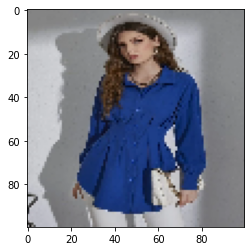

In [ ]:
import matplotlib.pyplot as plt

## /Dataset_small/images/
img = image.load_img('/gdrive/My Drive/Colab Notebooks/ICS619/xx.jpg',target_size=(img_w, img_h, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1,img_w,img_h,3)
classes = df2.columns[1:]
classes

y_prob = model_VGG.predict(img)
top5 = np.argsort(y_prob[0])[:-8:-1]
for i in range(7):
  print(classes[top5[i]])